In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
evals = pd.read_csv('../Data/teis.csv', dtype = {"Child ID" : object, "Cognitive T-Score" : object})

1. In which domains (and sub-domains) are children performing highest and lowest?

In [46]:
columns_to_convert = ['Adaptive Z-Score', 'Social-Emotional Z-Score', 'Communication Z-Score','Motor Z-Score','Cognitive Z-Score','Adaptive-Self Care Z-Score', 'Adaptive-Personal Responsibility Z-Score','Social Emotional-Adult Interaction Z-Score', 'Social Emotional-Self Concept / Social Role Z-Score','Communication-Receptive Communication Z-Score','Communication-Expressive Communication Z-Score','Motor-Gross Motor Z-Score', 'Motor-Fine Motor Z-Score','Motor-Perceptual Motor Z-Score','Cognitive-Attention and Memory Z-Score','Cognitive-Reasoning / Academic Skills Z-Score','Cognitive-Perception and Concepts Z-Score']

In [47]:
for col in columns_to_convert:
    if evals[col].dtype == 'object': 
        evals[col] = evals[col].str.replace(' ', '')
        evals[col] = evals[col].str.replace('–', '-')
        evals[col] = evals[col].str.replace('--','NaN')
print(columns_to_convert)

['Adaptive Z-Score', 'Social-Emotional Z-Score', 'Communication Z-Score', 'Motor Z-Score', 'Cognitive Z-Score', 'Adaptive-Self Care Z-Score', 'Adaptive-Personal Responsibility Z-Score', 'Social Emotional-Adult Interaction Z-Score', 'Social Emotional-Self Concept / Social Role Z-Score', 'Communication-Receptive Communication Z-Score', 'Communication-Expressive Communication Z-Score', 'Motor-Gross Motor Z-Score', 'Motor-Fine Motor Z-Score', 'Motor-Perceptual Motor Z-Score', 'Cognitive-Attention and Memory Z-Score', 'Cognitive-Reasoning / Academic Skills Z-Score', 'Cognitive-Perception and Concepts Z-Score']


In [48]:
columns_to_convert

['Adaptive Z-Score',
 'Social-Emotional Z-Score',
 'Communication Z-Score',
 'Motor Z-Score',
 'Cognitive Z-Score',
 'Adaptive-Self Care Z-Score',
 'Adaptive-Personal Responsibility Z-Score',
 'Social Emotional-Adult Interaction Z-Score',
 'Social Emotional-Self Concept / Social Role Z-Score',
 'Communication-Receptive Communication Z-Score',
 'Communication-Expressive Communication Z-Score',
 'Motor-Gross Motor Z-Score',
 'Motor-Fine Motor Z-Score',
 'Motor-Perceptual Motor Z-Score',
 'Cognitive-Attention and Memory Z-Score',
 'Cognitive-Reasoning / Academic Skills Z-Score',
 'Cognitive-Perception and Concepts Z-Score']

In [53]:
domainz = evals[columns_to_convert]

KeyError: None

In [50]:
columns_to_convert = columns_to_convert.sort()


In [51]:
domainz.columns = domainz.columns.sort_values()

In [52]:
domain_averages = domainz.mean().to_frame().reset_index().rename(columns ={'index' :'Tests', 0: 'Z_Score'})

#2. What is the pattern of children's scores? Do individual children tend to perform similarly across all domains or are there differences from domain to domain? Are these patterns similar for all children?

In [12]:
domain_averages.dtypes

Tests       object
Z_Score    float64
dtype: object

In [54]:
bdipr = ['Adaptive Percentile Rank','Adaptive-Self Care PR','Adaptive-Personal Responsibility PR','Cognitive Percentile Rank','Cognitive-Attention and Memory PR','Cognitive-Reasoning / Academic Skills PR','Cognitive-Perception and Concepts PR', 'Communication Percentile Rank','Communication-Receptive Communication PR','Communication-Expressive Communication PR','Motor Percentile Rank','Motor-Gross Motor PR', 'Motor-Fine Motor PR','Motor-Perceptual Motor PR','Social-Emotional Percentile Rank','Social Emotional-Adult Interaction PR', 'Social Emotional-Self Concept / Social Role PR']

In [55]:
evals[bdipr] = evals[bdipr].replace({'<':float(),'0.1': 0, '<0.1':0, '<1':0, '>99': 100, '>99.9': 100}).astype('float')

In [56]:
scorecomp = ['Child ID','Adaptive Percentile Rank','Adaptive-Self Care PR','Adaptive-Personal Responsibility PR','Cognitive Percentile Rank','Cognitive-Attention and Memory PR','Cognitive-Reasoning / Academic Skills PR','Cognitive-Perception and Concepts PR', 'Communication Percentile Rank','Communication-Receptive Communication PR','Communication-Expressive Communication PR','Motor Percentile Rank','Motor-Gross Motor PR', 'Motor-Fine Motor PR','Motor-Perceptual Motor PR','Social-Emotional Percentile Rank','Social Emotional-Adult Interaction PR', 'Social Emotional-Self Concept / Social Role PR']

In [57]:
percentiles = evals[scorecomp].drop(columns = 'Child ID')

In [58]:
percentiles

,Adaptive Percentile Rank,Adaptive-Self Care PR,Adaptive-Personal Responsibility PR,Cognitive Percentile Rank,Cognitive-Attention and Memory PR,Cognitive-Reasoning / Academic Skills PR,Cognitive-Perception and Concepts PR,Communication Percentile Rank,Communication-Receptive Communication PR,Communication-Expressive Communication PR,Motor Percentile Rank,Motor-Gross Motor PR,Motor-Fine Motor PR,Motor-Perceptual Motor PR,Social-Emotional Percentile Rank,Social Emotional-Adult Interaction PR,Social Emotional-Self Concept / Social Role PR
0,16.0,16.0,NaN,50.0,16.0,NaN,84.0,27.0,25.0,37.0,21.0,16.0,37.0,NaN,96.0,91.0,95.0
1,21.0,16.0,37.0,50.0,37.0,91.0,16.0,42.0,50.0,37.0,55.0,16.0,84.0,63.0,61.0,75.0,63.0
2,25.0,25.0,NaN,13.0,25.0,NaN,16.0,12.0,16.0,16.0,73.0,63.0,75.0,NaN,27.0,63.0,9.0
3,84.0,84.0,NaN,81.0,91.0,NaN,50.0,21.0,25.0,25.0,27.0,5.0,75.0,NaN,58.0,50.0,63.0
4,5.0,5.0,NaN,42.0,37.0,NaN,50.0,2.0,5.0,5.0,4.0,1.0,25.0,NaN,4.0,9.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23942,84.0,84.0,NaN,81.0,37.0,NaN,95.0,79.0,75.0,75.0,88.0,63.0,95.0,NaN,84.0,84.0,75.0
23943,84.0,50.0,95.0,93.0,84.0,91.0,91.0,79.0,91.0,50.0,87.0,95.0,63.0,75.0,86.0,75.0,84.0
23944,58.0,50.0,63.0,45.0,50.0,37.0,50.0,0.0,2.0,0.0,61.0,63.0,50.0,63.0,55.0,75.0,37.0
23945,21.0,9.0,50.0,21.0,16.0,25.0,37.0,5.0,16.0,5.0,50.0,37.0,50.0,63.0,25.0,25.0,9.0


In [59]:
corr_percentile = percentiles.corr()

In [66]:
high_corr = corr_percentile[(corr_percentile >= 0.6) & (corr_percentile < 0.77)]

In [67]:
high_corr

,Adaptive Percentile Rank,Adaptive-Self Care PR,Adaptive-Personal Responsibility PR,Cognitive Percentile Rank,Cognitive-Attention and Memory PR,Cognitive-Reasoning / Academic Skills PR,Cognitive-Perception and Concepts PR,Communication Percentile Rank,Communication-Receptive Communication PR,Communication-Expressive Communication PR,Motor Percentile Rank,Motor-Gross Motor PR,Motor-Fine Motor PR,Motor-Perceptual Motor PR,Social-Emotional Percentile Rank,Social Emotional-Adult Interaction PR,Social Emotional-Self Concept / Social Role PR
Adaptive Percentile Rank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adaptive-Self Care PR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adaptive-Personal Responsibility PR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.660488,NaN,NaN
Cognitive Percentile Rank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.662977,0.645784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cognitive-Attention and Memory PR,NaN,NaN,NaN,NaN,NaN,0.605986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cognitive-Reasoning / Academic Skills PR,NaN,NaN,NaN,NaN,0.605986,NaN,0.638454,NaN,0.606689,NaN,0.61504,NaN,NaN,NaN,NaN,NaN,NaN
Cognitive-Perception and Concepts PR,NaN,NaN,NaN,NaN,NaN,0.638454,NaN,0.626955,0.614291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Communication Percentile Rank,NaN,NaN,NaN,0.662977,NaN,NaN,0.626955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Communication-Receptive Communication PR,NaN,NaN,NaN,0.645784,NaN,0.606689,0.614291,NaN,NaN,0.640678,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Communication-Expressive Communication PR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.640678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
corr_set = { 
    ('Adaptive - Personal Responsibility', 'Social-Emotional', 0.660488),
    ('Cognitive','Communication', 0.662977),
    ('Cognitive','Communication - Receptive Communication', 0.645784),
    ('Cognitive-Reasoning / Academic Skills', 'Motor Percentile Rank', 0.61504),
    ('Cognitive - Attention and Memory', 'Cognitive-Reasoning / Academic Skills', 0.605986),
    ('Cognitive - Attention and Memory','Cognitive-Perception and Concepts', 0.638454),
    ('Cognitive - Perception and Concepts','Communication', 0.626955),
    ('Cognitive - Perception and Concepts','Communication - Receptive Communication', 0.614291),
    ('Communication - Expressive Communication','Communication - Receptive Communication', 0.640678)
    }

In [77]:
corr_list = [{'Variable1': pair[0], 'Variable2': pair[1], 'Correlation': pair[2]} for pair in corr_set]

In [78]:
correlations = pd.DataFrame(corr_list)

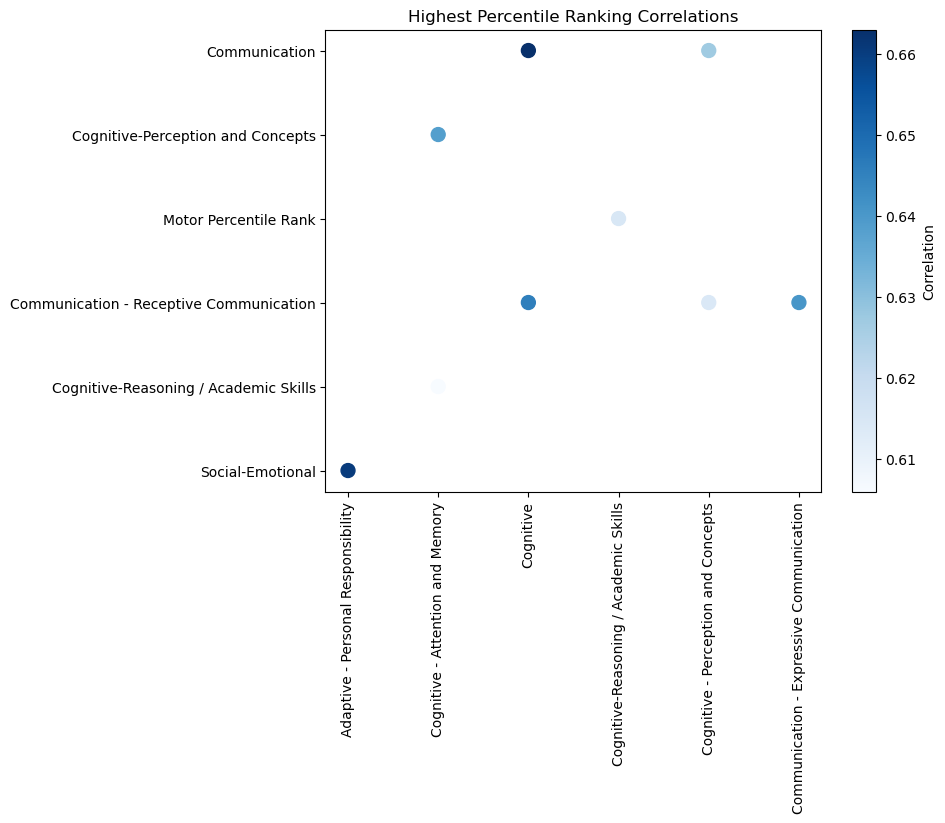

In [102]:
plt.figure(figsize=(8, 6))
plt.scatter(correlations['Variable1'], correlations['Variable2'], c=correlations['Correlation'], cmap='Blues', s=100)
plt.colorbar(label='Correlation')
plt.title('Highest Percentile Ranking Correlations')
plt.xticks(rotation=90)
plt.show()

5. Eligibility is currently based on domains. A child would be considered eligible based on a 40% delay in one area or 25% delay in two areas, as determined by Development Quotient (DQ) scores. A DQ of 70 or less indicates a 40% delay, and a DQ between 71 and 78 indicates a 25% delay. If TEIS added an option for eligibility based on the total score on the BDI-3 total score (DQ score of 70 or less), are there any children who would have qualified that did not qualify based on the current method?


6. Is there a4. Does the child's age seem to impact their scoring?
ny difference in scoring noted based on evaluation type?

7. Is there any notable pattern of scoring by region? Note: TEIS contracts with three agencies for evaluations (one per grand region) as follows:  
* East TN, First TN and Southeast
* Greater Nashville, Upper Cumberland, and South Central
* Northwest, Southwest, and Memphis Delta

8. Is there any notable pattern of scoring by evaluator?